**1. The black dot is the new instance we are going to predict with K-nearest Neighbour. Using Euclidean Distance, calculate its distances to its 3 nearest neighbors. What is the shape of this dot if k=3? What would be its shapes if k = 5?    10 points**

In [23]:
import math
import numpy as np
import pandas as pd
# sqrt( (x1-x2)^2 + (y1-y2)^2 )
x_true = np.array([[0.5], [1], [2.1], [2.5], [2.5]])
y_true = np.array([[1.5], [2], [2.6], [0.5], [2]])
x_false = np.array([[1.5], [1.9], [2], [3.1], [3.6]])
y_false = np.array([[0.5], [0], [2], [2], [1]])
x_y_ukn = np.array([[1], [1]])

def distance(x1, x2, y1, y2):
    distance = math.sqrt(((x1 - x2)**2) + ((y1 - y2)**2))
    return distance

# k = 3
print("First Nearest:")
near_1 = distance(x_true[0], x_y_ukn[0], y_true[0], x_y_ukn[1])
print(near_1)

print("Second Nearest:")
near_2 = distance(x_true[1], x_y_ukn[0], y_true[1], x_y_ukn[1])
print(near_1)

print("Third Nearest:")
near_3 = distance(x_false[0], x_y_ukn[0], y_false[0], x_y_ukn[1])
print(near_1)

First Nearest:
0.7071067811865476
Second Nearest:
0.7071067811865476
Third Nearest:
0.7071067811865476


If k=3, the shape of the dot would be a triangle since out of the k-nearest, most of them are triangles.
If k=5, the shape of the dot would be a circle since out of the k-nearest, most of them are circles.

**2. Download the dataset for this assignment at, https://drive.google.com/file/d/1HCvBMHk1Xc1deEFJF3TrT7GOEmAACbUN/view?usp=sharing.  This is the dataset of 100 patients’ records with their diagnostic result. The variable ‘diagnosis_result’ is the target variable, malignant (M) or benign (B). Check the number of null values. Drop the column ‘id’. Replace the target variable with numerical values, 1 for malignant, 0 for benign.  10 points**

In [24]:
df = pd.read_csv('Prostate_Cancer.csv')
df = df.rename(columns={'diagnosis_result': 'target'})
df_new = pd.get_dummies(df, columns=['target'], drop_first=True)
df_new.head(5)

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,target_M
0,1,23,12,151,954,0.143,0.278,0.242,0.079,1
1,2,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,3,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,4,14,16,78,386,0.070,0.284,0.260,0.097,1
4,5,9,19,135,1297,0.141,0.133,0.181,0.059,1


In [25]:
new_df = df_new.drop('id', axis=1)
new_df.columns.tolist()

['radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'symmetry',
 'fractal_dimension',
 'target_M']

**3. Use boxplot and ANOVA test to check the relationship between the features and the target variable. Drop the columns that show no significant difference between the group ‘M’ and group ‘B’.  10 points**

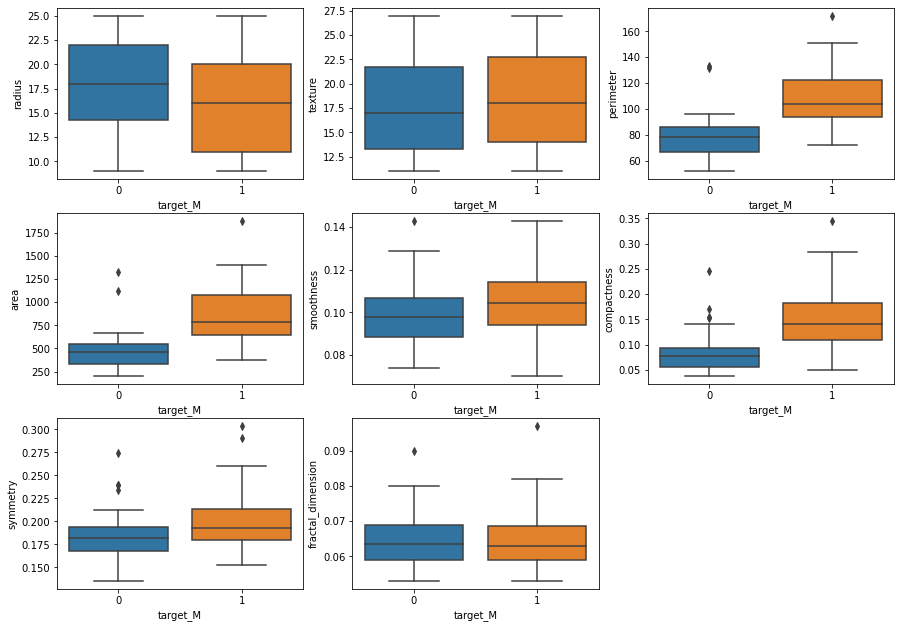

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']
fig=plt.figure(figsize=(15, 22))

for i in range(len(cols)):
    column=cols[i]
    sub=fig.add_subplot(6, 3, i+1)
    sns.boxplot(x='target_M',y=column, data=new_df)

In [27]:
# ANOVA
from sklearn.feature_selection import SelectKBest, f_classif
x = new_df.loc[:, cols]
y = new_df.loc[:, 'target_M']


fs = SelectKBest(score_func=f_classif, k='all')  # call the method
FeaturesS = fs.fit(x, y)    # train the model
np.set_printoptions(suppress = True)
print(FeaturesS.scores_)    # print out the scores 
print(FeaturesS.pvalues_)

[ 3.16831102  0.49280187 57.32217182 45.34674542  3.98264084 34.86033569
  5.62717089  0.0065575 ]
[0.07817949 0.48434404 0.         0.         0.04874705 0.00000005
 0.01963757 0.93562431]


**Columns to drop -> affect the target in the same way (reduce dimension of the df)**
low F-score and a p-value higher than 0.05
- radius
- texture
- fractal_dimension

In [28]:
sig_df = new_df.drop(['texture', 'fractal_dimension', 'radius'], axis=1)
sig_df.columns.tolist()

['perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'target_M']

**4. Use correlation analysis to drop the columns that have strong correlation relationship with the others.  10 points**

In [29]:
print(sig_df.corr())

             perimeter      area  smoothness  compactness  symmetry  target_M
perimeter     1.000000  0.976648    0.269442     0.527542  0.195539  0.607498
area          0.976648  1.000000    0.208438     0.424950  0.110435  0.562444
smoothness    0.269442  0.208438    1.000000     0.465723  0.424203  0.197616
compactness   0.527542  0.424950    0.465723     1.000000  0.681123  0.512234
symmetry      0.195539  0.110435    0.424203     0.681123  1.000000  0.233028
target_M      0.607498  0.562444    0.197616     0.512234  0.233028  1.000000


Perimeter has the highest correlation to the target and the highest F-score. Area has the highest correlation to perimeter and these variables are algebraically related (using the same numbers, radius, to calculate), therefore their correlation to the target is about the same. We can shrink the dataframe by choosing only one of these variables to keep, rather than both.

Since area is less related to the target, let's drop that one.

In [30]:
# drop the area col.
correl_df = sig_df.drop('area', axis=1)
correl_df.columns.tolist()

['perimeter', 'smoothness', 'compactness', 'symmetry', 'target_M']

**5. Explain in your own words why feature scaling is important to the KNN algorithm.  Normalize all the features.  10 points**

Feature scaling is important for the KNN algorithm because outliers in the dataset will directly affect the Euclidean distance, which will affect the k-nearest neighbor value, since this algorithm relies on the x-values.

In [31]:
# identify the features 
# can get more than two features
x_final = correl_df.loc[:, ['perimeter', 'smoothness', 'compactness', 'symmetry']]

# import libraries
from sklearn.preprocessing import MinMaxScaler

# normalize
nor_x= MinMaxScaler()    
x_scaled= nor_x.fit_transform(x_final) 
x_scaled

array([[0.825     , 1.        , 0.78175896, 0.63313609],
       [0.675     , 1.        , 0.13355049, 0.27218935],
       [0.65      , 0.75342466, 0.39739414, 0.4260355 ],
       [0.21666667, 0.        , 0.80130293, 0.73964497],
       [0.69166667, 0.97260274, 0.30944625, 0.27218935],
       [0.25833333, 0.79452055, 0.42996743, 0.43786982],
       [0.56666667, 0.34246575, 0.23127036, 0.26035503],
       [0.31666667, 0.67123288, 0.41368078, 0.50295858],
       [0.3       , 0.78082192, 0.50488599, 0.59171598],
       [0.26666667, 0.67123288, 0.65798046, 0.40236686],
       [0.425     , 0.16438356, 0.09446254, 0.10650888],
       [0.43333333, 0.36986301, 0.29641694, 0.28994083],
       [0.66666667, 0.36986301, 0.67752443, 0.62130178],
       [0.43333333, 0.19178082, 0.2019544 , 0.29585799],
       [0.35      , 0.5890411 , 0.62214984, 0.4260355 ],
       [0.375     , 0.60273973, 0.39739414, 0.56213018],
       [0.35833333, 0.39726027, 0.11074919, 0.14201183],
       [0.46666667, 0.64383562,

In [32]:
print("Min:")
print(x_scaled.min())
print("Max:")
print(x_scaled.max())

Min:
0.0
Max:
1.0


**6. Build a K-Nearest Neighbor model with k = 3. Use a 10 folds cross validation to obtain the average accuracy score for a KNN model when k=3.  10 points**

In [33]:
# KNN model - cross val.
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
model1 = KNeighborsClassifier(n_neighbors=3)

cv_scores = cross_val_score(model1, x_scaled, y, cv=10, scoring='accuracy')
print(cv_scores)

[0.7 0.8 1.  1.  0.9 0.8 0.7 0.9 0.8 0.9]


In [34]:
print(cv_scores.mean())

0.85


**7.  Set up k values to odd numbers from 1 to 15.  Explain why k shall not be even numbers in this case.  10 points**

In [35]:
k_values = []
for i in range(1, 15):
    if i%2 !=0: 
        k_values.append(i)
print(k_values)

[1, 3, 5, 7, 9, 11, 13]


For this instance, an even k is not optimal because we have an even number of variables, in which case choosing the most optimal k could result in a tie for the optimal k. When it is odd, this guarantees that only one k would be the most optimal one, rather than risk of a tie between two.

**8. Build KNN prediction models with the preset k-values. Use cross validation to obtain the average accuracy scores for the KNN models. Find the optimal k.  20 points**

In [36]:
k_accuracy_scores = [] 

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='accuracy')
    k_accuracy_scores.append(cv_scores.mean()) 

# accuracy score for every k value w/ cross validation
df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'accuracy']) 

print(df_k_scores)

      k  accuracy
0   1.0      0.77
1   3.0      0.85
2   5.0      0.85
3   7.0      0.83
4   9.0      0.85
5  11.0      0.86
6  13.0      0.85


**Optimal K**
- *this is the k w/ the highest accuracy score*?

The optimal k is the k-value that produces the highest accuracy score. In this case, it appears that the highest accuracy score results when the k = 11.0.

**9. Besides accuracy, there are other metrics to evaluate a classification model, which is especially helpful when the data is imbalanced. Learn about precision, recall, and f1 score with the materials below. Change the scoring option for cross validation to f1. Did the optimal k value change? 10 points**

In [37]:
# F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
k_accuracy_scores = [] 

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='f1')
    k_accuracy_scores.append(cv_scores.mean()) 

# accuracy score for every k value w/ cross validation
df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'f1']) 

print(df_k_scores)

      k        f1
0   1.0  0.801724
1   3.0  0.888015
2   5.0  0.886925
3   7.0  0.862639
4   9.0  0.881803
5  11.0  0.888280
6  13.0  0.880705


The optimal k value for f1 score and accuracy score in cross validation are different. The f1 scores appear to be slightly lower than the accuracy scores. Here, the optimal k appears to be when k=11.0, which is still the same optimal k as the accuracy, but the scores themselves are different.